Aquest codi llegeix els fitxers amb les dades de les estadístiques dels jugadors i en treu les classificacions.

In [1]:
#!pip install numpy==1.25.2
#!pip uninstall xarray scipy netCDF4
#!pip install xarray scipy netCDF4
#!pip install pybin11 --upgrade

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

In [3]:
# Definim tab20 com la paleta per defecte dels plots
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab20.colors)

In [4]:
# Llegim les dades
dataarray = xr.open_dataset('stats.nc', engine='scipy')
dataarray

<xarray.Dataset> Size: 6kB
Dimensions:       (player: 15, matchday: 13)
Coordinates:
  * player        (player) object 120B 'Alejandro' 'Antía' ... 'Víctor'
  * matchday      (matchday) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    GamesPlayed   (matchday, player) int32 780B ...
    WinPlayed     (matchday, player) float64 2kB ...
    Scored        (matchday, player) float64 2kB ...
    ScoredPlayed  (matchday, player) float64 2kB ...

In [5]:
# Extreiem els noms dels jugadors i les jornades
players_names = dataarray['player'].astype(str).values # noms dels jugadors
matchdays = dataarray['matchday'] # array de números de jornades

In [6]:
# Filtrem els jugadors que han jugat menys partits
#TODO

In [7]:
# Extreiem els valors de victòries / jugats de l'última jornada
winplayed_values = dataarray['WinPlayed'].isel(matchday = -1).values

# Ordenem de major a menor
winplayed_sorted_idx = np.argsort(winplayed_values)[::-1] # índexs d'ordre (revertim per fer de major a menor)
winplayed_sorted = winplayed_values[winplayed_sorted_idx] # ordenem
winplayed_sorted = np.round(winplayed_sorted, 2) # arrondonim els valors a 2 xifres decimals

players_names_sorted = players_names[winplayed_sorted_idx] # ordenem els noms dels jugadors

#Posem els resultats a una taula (DataFrame)
winplayed_stats = pd.DataFrame(np.array([players_names_sorted, winplayed_sorted]).T, index = np.arange(1, players_names_sorted.shape[0]+1))
caption = "Games won / Games played (Matchday %.1d)" % (matchdays[-1])
winplayed_stats = winplayed_stats.style.set_caption(caption) # afegim títol al dataframe

# Guardem la taula en HTML per mostrar-la al README
winplayed_stats.to_html('results/winplayed_stats.html')

winplayed_stats

,0,1
1,Simone,1.0
2,Tiziano,0.5
3,Pablo,0.5
4,Alejandro,0.33
5,Rebeca,0.22
6,Elena,0.2
7,Víctor,0.14
8,Pedro,0.12
9,Antía,0.06
10,Pau,0.05


### Gràfic

Fem un gràfic de l'evolució dels paràmetres durant les jornades

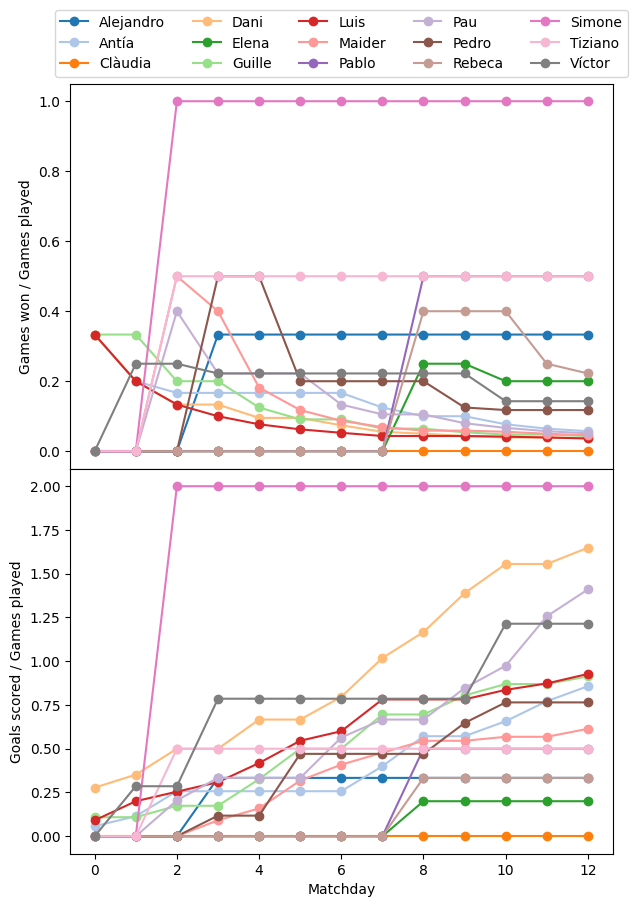

In [8]:
# Initialize figure
fig, axs = plt.subplots(figsize=(7, 10), ncols= 1, nrows = 2, sharex=True)
axs = axs.flatten()

# Extract parameters values
winplayed_values = dataarray['WinPlayed']
scoredplayed_values = dataarray['ScoredPlayed']

# Plot for every player
for player in players_names:
    winplayed_evolution = winplayed_values.sel(player = player)
    winplayed_evolution_values = winplayed_evolution.values
    scoredplayed_evolution = scoredplayed_values.sel(player = player)
    scoredplayed_evolution_values = scoredplayed_evolution.values

    axs[0].plot(matchdays, winplayed_evolution_values, marker='o', label=player)
    axs[1].plot(matchdays, scoredplayed_evolution_values, marker='o', label=player)
    
axs[0].legend(bbox_to_anchor = ( 0.5, 1.), ncol = 5, loc = 'lower center')
axs[1].set_xlabel("Matchday")
axs[0].set_ylabel("Games won / Games played")
axs[1].set_ylabel("Goals scored / Games played")

# Guardem la figura per poderla posar al README
plt.subplots_adjust(hspace=0.0)
plt.savefig('results/winplayed_stats.png', dpi=300, bbox_inches='tight')